# Un-supervised ML -Clustering


ML depending on the data type we have.
-->Supervised
-->Unsupervised Machine learning

In supervised ML , we have labeled data , we know the correct value of inputs , 
like knowing Car prices based on features like model,style,mileage and other attributes.

Unsupervised learning - we have data that is completely unlabled. we don't know if there are any 
pattern hidden in the data., so we leave it to the algorithm to find anything it can.

Clustering is an unsupervised machine learning task.

Using a clustering algorithm means - we are giving a lot of input data but with no Label- 
and let algorithm to find any grouping in the data it can.

Those groupings are called clusters-
A cluster is a group of data points that are similar to each other based 
on their relation to surrounding data points. 

Clustering is used for - feature engineering or pattern recognization.

In [ ]:
Particularly, clustering, the most important unsupervised learning problem, 
is able to create categories grouping similar individuals.

These categories are called clusters. A cluster is a collection of points in 
a dataset. These points are more similar between them than they are to 
points belonging to other clusters.

In [ ]:
Distance-based clustering groups the points into some number of clusters 
such that distances within the cluster should be small while distances 
between clusters should be large.

Types of clustering algorithms-
Centroid-based
Hierachical Clustering

# Centroid-based clustering

Centroid-based
Centroid-based clustering is little sensitive to the initial 
parameters you give it, but it's fast and efficient.

These types of algorithms separate data points based on multiple 
centroids in the data. 

Each data point is assigned to a cluster 
based on its squared distance from the centroid. 

Example:- KMEANS clustering algorithm.




# KMEANS clustering algorithm.


K-Means clustering :- The main goal of this algorithm to find  no. of effective groups in data . 
The  number of groups is represented by K. It is an iterative procedure where 
each data point is assigned to one of the K groups based on feature similarity.

K-Means algorithm starts with initial estimates of K centroids, which are randomly 
selected from the dataset. The algorithm iterates between two steps 
assigning data points and updating Centroids.

The main idea is to reduce the distance between the data points and their respective 
cluster centroid.

The quality of the cluster assignments is determined by 
computing the sum of the squared error (SSE) after the centroids converge, 
or match the previous iteration’s assignment. 
The SSE is defined as the sum of the squared Euclidean distances of each point
to its closest centroid. 

Since this is a measure of error, the objective of k-means is to try to minimize this value.
The figure below shows the centroids and SSE updating through the first five iterations from 
two different runs of the k-means algorithm on the same dataset:



# Choosing K value:-

Choosing K value:-
    
One method of choosing value K is the elbow method. In this method 
we will run K-Means clustering for a range of K values lets say ( K= 1 to 10 ) 
and calculate the Sum of Squared Error (SSE). 
SSE is calculated as the mean distance between data points and their cluster centroid.

Then plot a line chart for SSE values for each K, if the line chart looks
like an arm then the elbow on the arm is the value of K that is the best.

# Hierarchical clustering :-

Hierarchical clustering :-
It builds a tree of clusters so everything 
is organized from the top-down.

Dendrograms are used to create the hierarchy of the clusters.
in which the X axis of the dendrogram represents the features or 
columns of the dataset, and the Y axis of the dendrogram represents 
the Euclidian distance between data observations.


Some real world applications of clustering include fraud detection in insurance, 
, customer segmentation in marketing. 

It can also be used in larger problems, like earthquake analysis ,
city planning,anomaly detection and find outliers in  data. 



SSE is calculated by squaring each points distance to its respective clusters 
centroid and then summing everything up

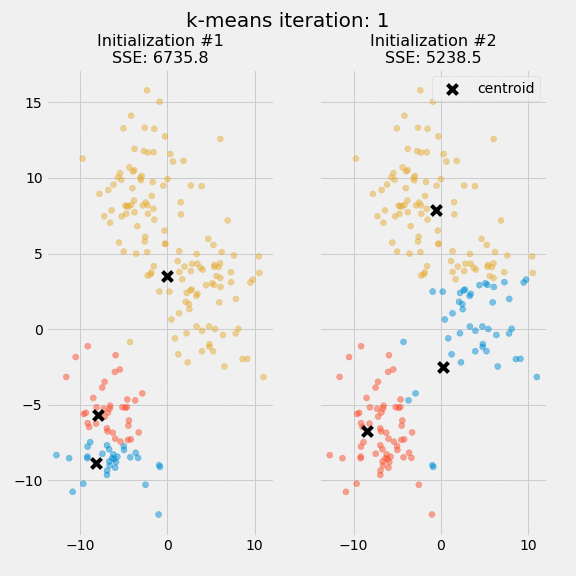# 

In [1]:
# import baasic libriries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("spending_score.csv")

In [3]:
df=data.copy()

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# create clusters on the basis of annual income and spending score

In [7]:
# centroid based clustering approach--is similary calles kmeans approach

In [8]:
X=df[["Annual Income (k$)","Spending Score (1-100)"]]

In [9]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [18]:
from sklearn.cluster import KMeans
kmeans1=KMeans(n_clusters=7)


In [19]:
kmeans1.fit(X)

KMeans(n_clusters=7)

In [20]:
# calculate sum of SSE

In [21]:
kmeans1.inertia_

30273.394312070042

In [34]:
# lesser the SSE() better the clustering model --effective the clusters

In [35]:
# how to find the effec. clusters --remember the KNN model

Text(0, 0.5, 'sum of square error')

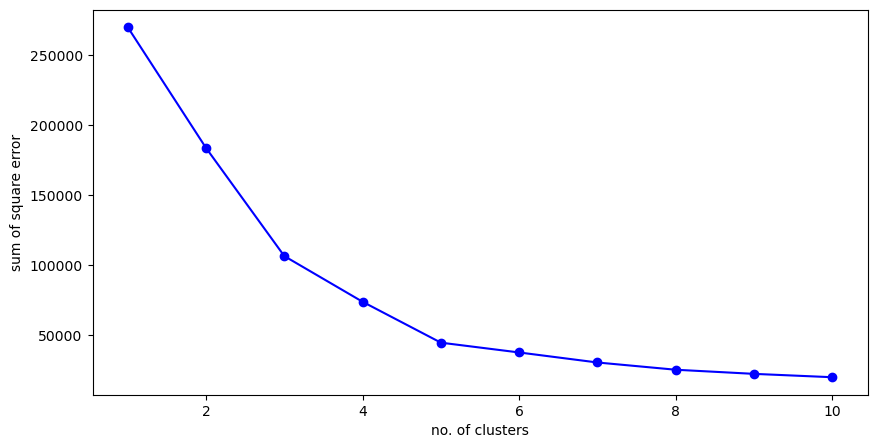

In [27]:
SSE=[]
for i in range(1,11):
    KM=KMeans(n_clusters=i,max_iter=500)
    KM.fit(X)
    # APPEND THE SSE
    SSE.append(KM.inertia_)
    
# plot the graph -- elbow approach  x axis- no. of cluster, Y axis-- SSE

plt.figure(figsize=(10,5))
plt.plot(range(1,11),SSE,color="b",marker="o")
plt.xlabel("no. of clusters")
plt.ylabel("sum of square error")

In [28]:
# as per the elbow method--we found that no. of best clusters=4

In [29]:
km1=KMeans(n_clusters=4)
km1.fit(X)
y=km1.predict(X)
df["Label"]=y
df.head(100)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
95,96,Male,24,60,52,0
96,97,Female,47,60,47,0
97,98,Female,27,60,50,0
98,99,Male,48,61,42,0


In [30]:
df["Label"].value_counts()

0    100
2     39
1     38
3     23
Name: Label, dtype: int64

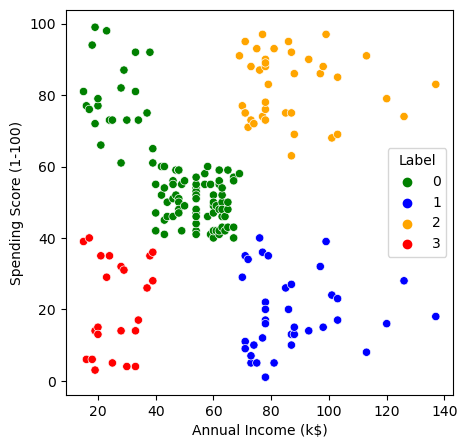

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="Label", data=df, palette=["green", "blue", "orange", "red"], legend="full")
plt.show()


In [37]:
# evaluate the cluster use silhoutte score (-1 to +1) most of time it will be 0 to 1
# around 0.5 conssidere as good cluster
# it is around 0,that means there is some overlapping

In [38]:
from sklearn.metrics import silhouette_score

In [39]:
silhouette_score(X,km1.labels_)

0.4931963109249047

In [40]:
# davis Bouldin index

In [41]:
from sklearn.metrics import davies_bouldin_score
# 0 to 1..more close to 1 cluster is good

In [42]:
davies_bouldin_score(X,km1.labels_)

0.7103644068779902

In [45]:
cust0=df[df["Label"]==0]
print("the customer in  group 0 are ",cust0["CustomerID"].values)

the customer in  group 0 are  [  2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36
  38  40  42  44  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123]


In [ ]:
# Dendrograms--A type of tree diagram--hierachical clustering
# mostly used in biology, where they show the clustering between genes and sample.


In [48]:
df10=data.copy()

In [49]:
df10.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [50]:
import scipy.cluster.hierarchy as shc

In [51]:
x_new=df10[["Annual Income (k$)","Spending Score (1-100)"]]

In [52]:
x_new.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


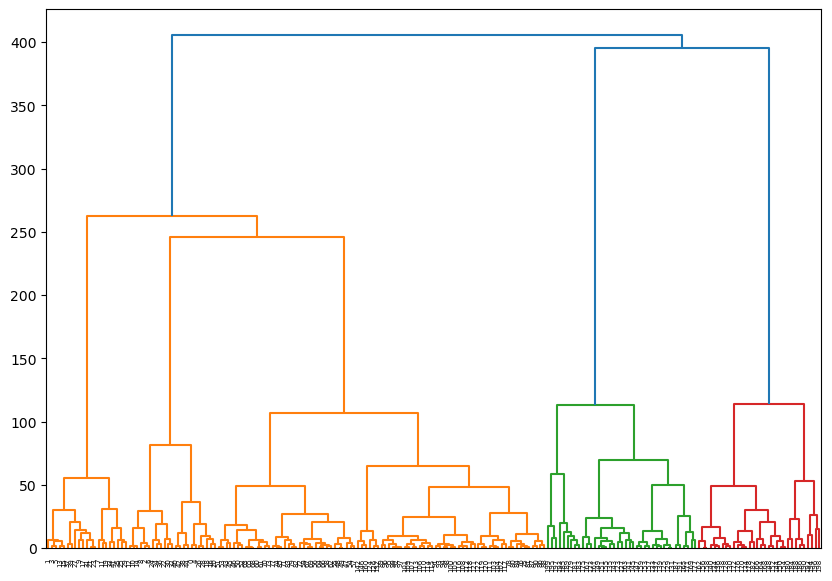

In [54]:
plt.figure(figsize=(10,7))
dend=shc.dendrogram(shc.linkage(x_new,method="ward"))
plt.show()

In [55]:
# THE X axis represents the data of the attributes
# y axis ---eucledian distance between the data under observation

In [56]:
# how to read the dendrogram

In [57]:
# lets create a horisontal line(axhline) with a distance of 150 --200.. lets counts
# the vertivcal line passes to horizontal line

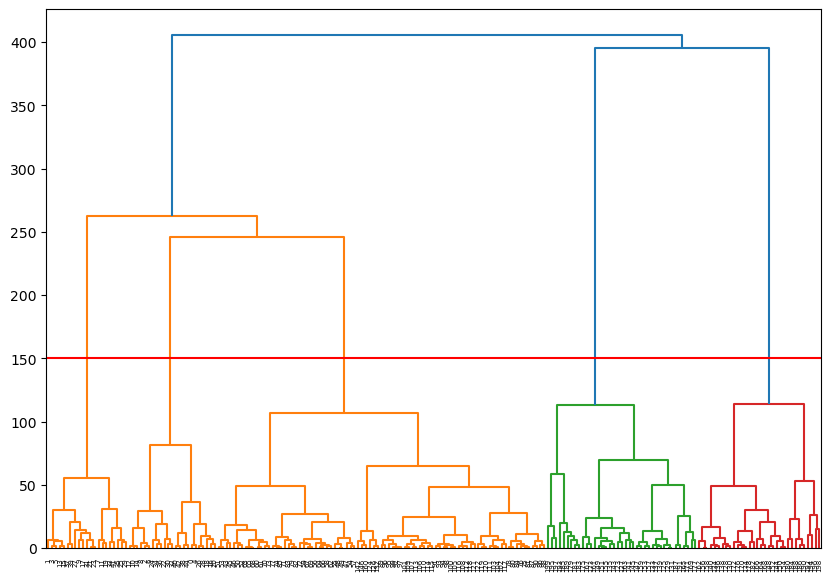

In [59]:
plt.figure(figsize=(10,7))
dend=shc.dendrogram(shc.linkage(x_new,method="ward"))
plt.axhline(y=150,color='r')
plt.show()

In [60]:
# agglomerative clustering

In [61]:
from sklearn.cluster import AgglomerativeClustering

In [63]:
cluster=AgglomerativeClustering(n_clusters=5,affinity="euclidean")

In [64]:
y_agg=cluster.fit_predict(x_new)
y_agg

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [65]:
cluster=AgglomerativeClustering(n_clusters=4,affinity="euclidean")
y_agg=cluster.fit_predict(x_new)
y_agg

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [66]:
df["Label_Agg"]=y_agg

In [67]:
df.head(100)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Label,Label_Agg
0,1,Male,19,15,39,3,0
1,2,Male,21,15,81,0,3
2,3,Female,20,16,6,3,0
3,4,Female,23,16,77,0,3
4,5,Female,31,17,40,3,0
...,...,...,...,...,...,...,...
95,96,Male,24,60,52,0,0
96,97,Female,47,60,47,0,0
97,98,Female,27,60,50,0,0
98,99,Male,48,61,42,0,0


In [77]:
cust2=df[df["Label"]==2]
print("the customer in  group 3 are ",cust3["CustomerID"].values)

the customer in  group 3 are  [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42]


In [78]:
cust2=df[df["Label_Agg"]==2]
print("the customer in  group 3 are ",cust3["CustomerID"].values)

the customer in  group 3 are  [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42]


In [79]:
df["Label_Agg"].value_counts()

0    108
2     39
1     32
3     21
Name: Label_Agg, dtype: int64

In [80]:
df["Label"].value_counts()

0    100
2     39
1     38
3     23
Name: Label, dtype: int64

In [81]:
silhouette_score(x_new,cluster.labels_)

0.4916598193892782

In [83]:
from sklearn.metrics import davies_bouldin_score

In [86]:
davies_bouldin_score(x_new,cluster.labels_)

0.6712836786400214